# Basic Image Enhancement

## Importing Modules

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## Download Assets

In [2]:
def download_and_unzip(url, zip_file, folder):
    print(f'Downloading and extracting assets...', end='')

    if not os.path.exists(folder):
        os.makedirs(folder)
        
    try:
        # download the zip file if it doesn't exist
        if not os.path.exists(zip_file):
            urlretrieve(url, zip_file)
        
        # unzip the file
        with ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(folder)
        print('Done!')
        
    except Exception as e:
        print(f'Error: {e}')

In [3]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"
folder = os.path.join(os.getcwd(), 'assets')
zip_file = os.path.join(folder, 'opencv_bootcamp_assets_NB4.zip')

download_and_unzip(URL, zip_file, folder)

### <font color='green'>Original Image</font>

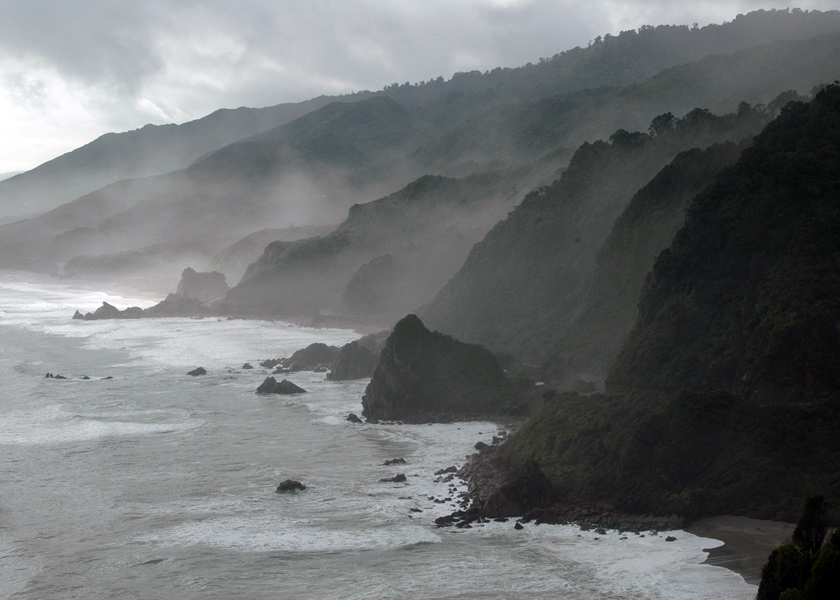

In [4]:
img_bgr = cv2.imread('assets/New_Zealand_Coast.jpg')
img_rgb = img_bgr[:, :, ::-1]

Image(filename='assets/New_Zealand_Coast.jpg')

## Addition or Brightness

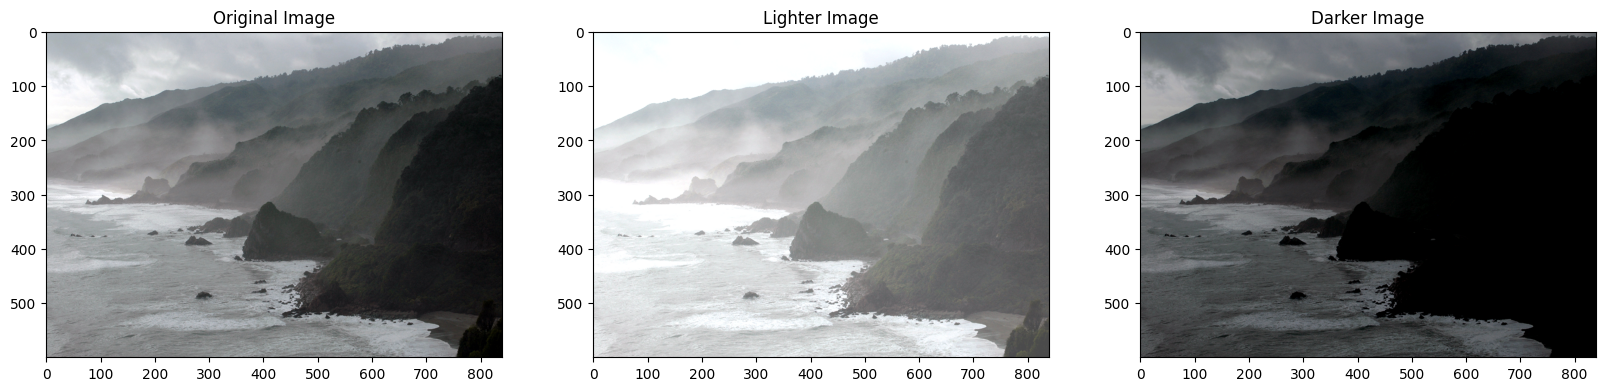

In [5]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 75

img_rgb_lighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

# Show the images
plt.figure(figsize=[20, 10])
plt.subplot(131); plt.imshow(img_rgb); plt.title("Original Image")
plt.subplot(132); plt.imshow(img_rgb_lighter); plt.title("Lighter Image")
plt.subplot(133); plt.imshow(img_rgb_darker); plt.title("Darker Image")
plt.show()

## Multiplication or Contrast

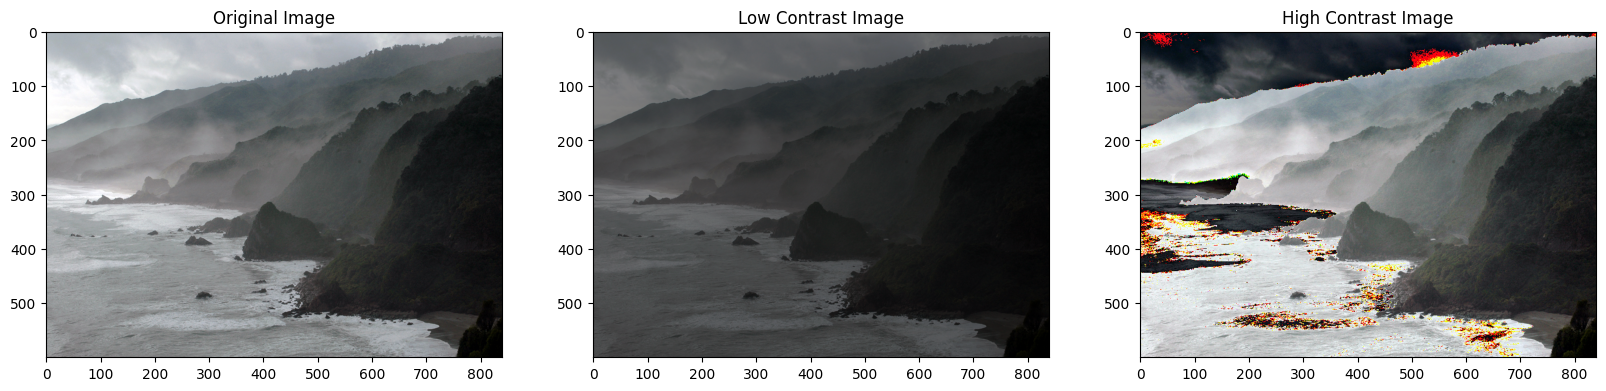

In [6]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.5
matrix_high_contrast = np.ones(img_rgb.shape) * 1.5

img_rgb_low_contrast = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_high_contrast = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_high_contrast))

# Show the images
plt.figure(figsize=[20, 10])
plt.subplot(131); plt.imshow(img_rgb); plt.title("Original Image")
plt.subplot(132); plt.imshow(img_rgb_low_contrast); plt.title("Low Contrast Image")
plt.subplot(133); plt.imshow(img_rgb_high_contrast); plt.title("High Contrast Image")
plt.show()

### <font color='green'>Handling Overflow using np.clip</font>

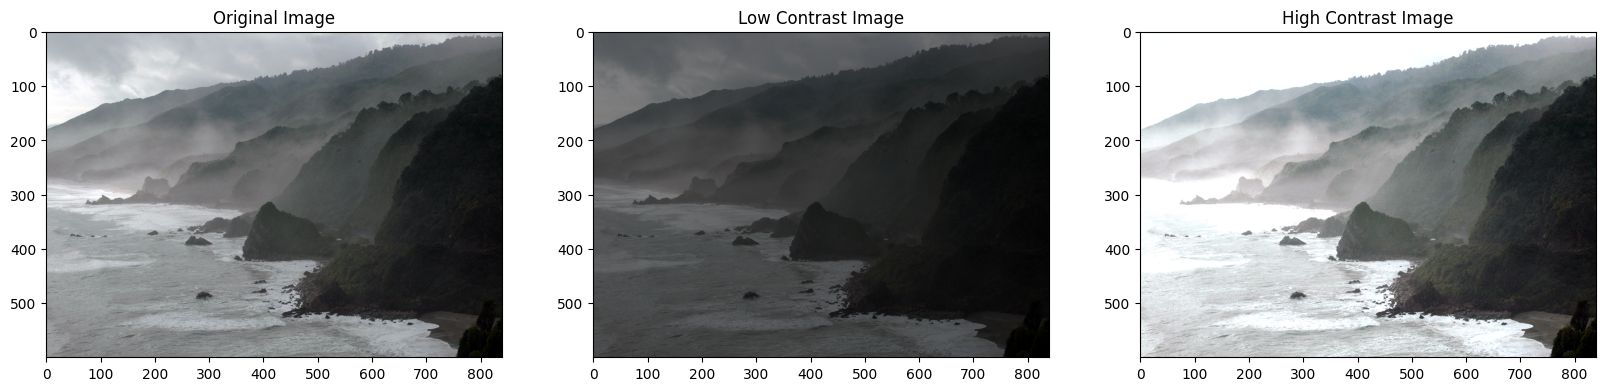

In [7]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.5
matrix_high_contrast = np.ones(img_rgb.shape) * 1.5

img_rgb_low_contrast = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_high_contrast = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix_high_contrast), 0, 255))

# Show the images
plt.figure(figsize=[20, 10])
plt.subplot(131); plt.imshow(img_rgb); plt.title("Original Image")
plt.subplot(132); plt.imshow(img_rgb_low_contrast); plt.title("Low Contrast Image")
plt.subplot(133); plt.imshow(img_rgb_high_contrast); plt.title("High Contrast Image")
plt.show()

## Image Thresholding

Function Syntax:
```python
cv2.threshold(src, threshold_value, max_value, threshold_type)
```

### <font color='green'>Adaptive Thresholding</font>

Function Syntax:
```
cv2.adaptiveThreshold(src, max_value, adaptive_method, threshold_type, block_size, constant)
```

(572, 800)


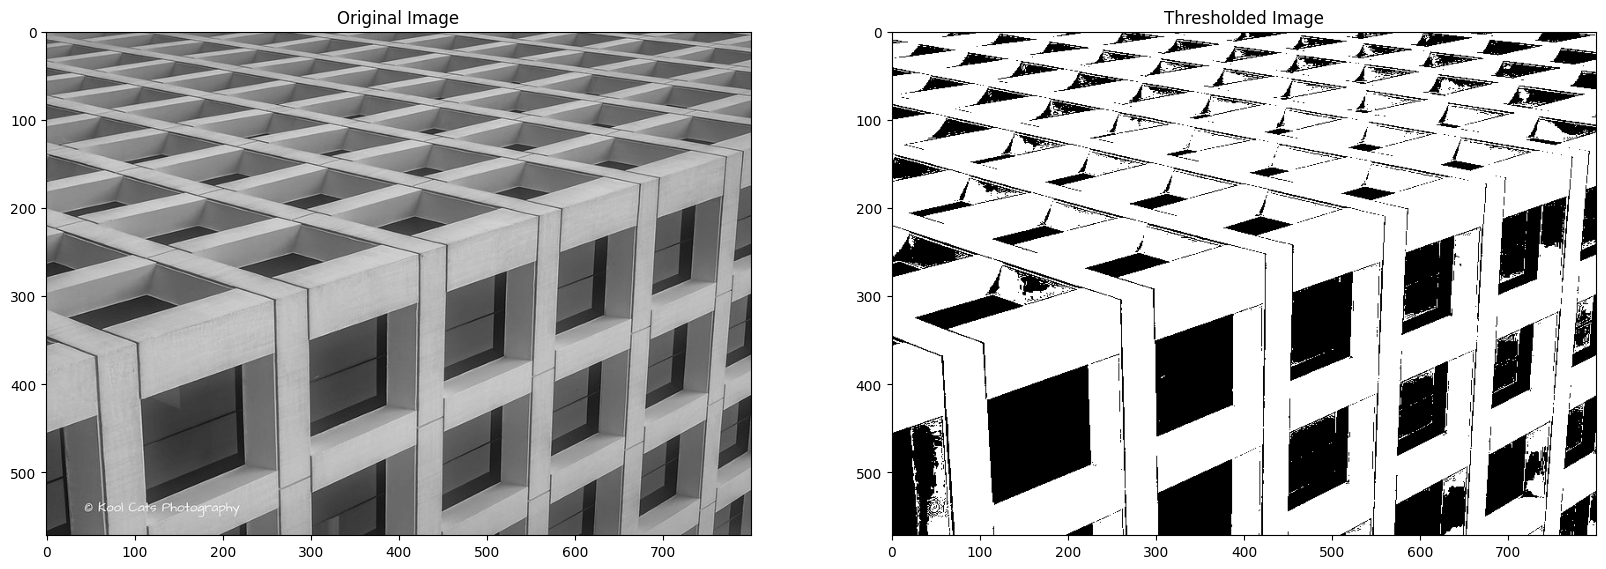

In [8]:
img_read = cv2.imread("assets/building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[20, 10])
plt.subplot(121); plt.imshow(img_read, cmap='gray'); plt.title("Original Image")
plt.subplot(122); plt.imshow(img_thresh, cmap='gray'); plt.title("Thresholded Image")

print(img_thresh.shape)

## Application: Sheet Music Reader

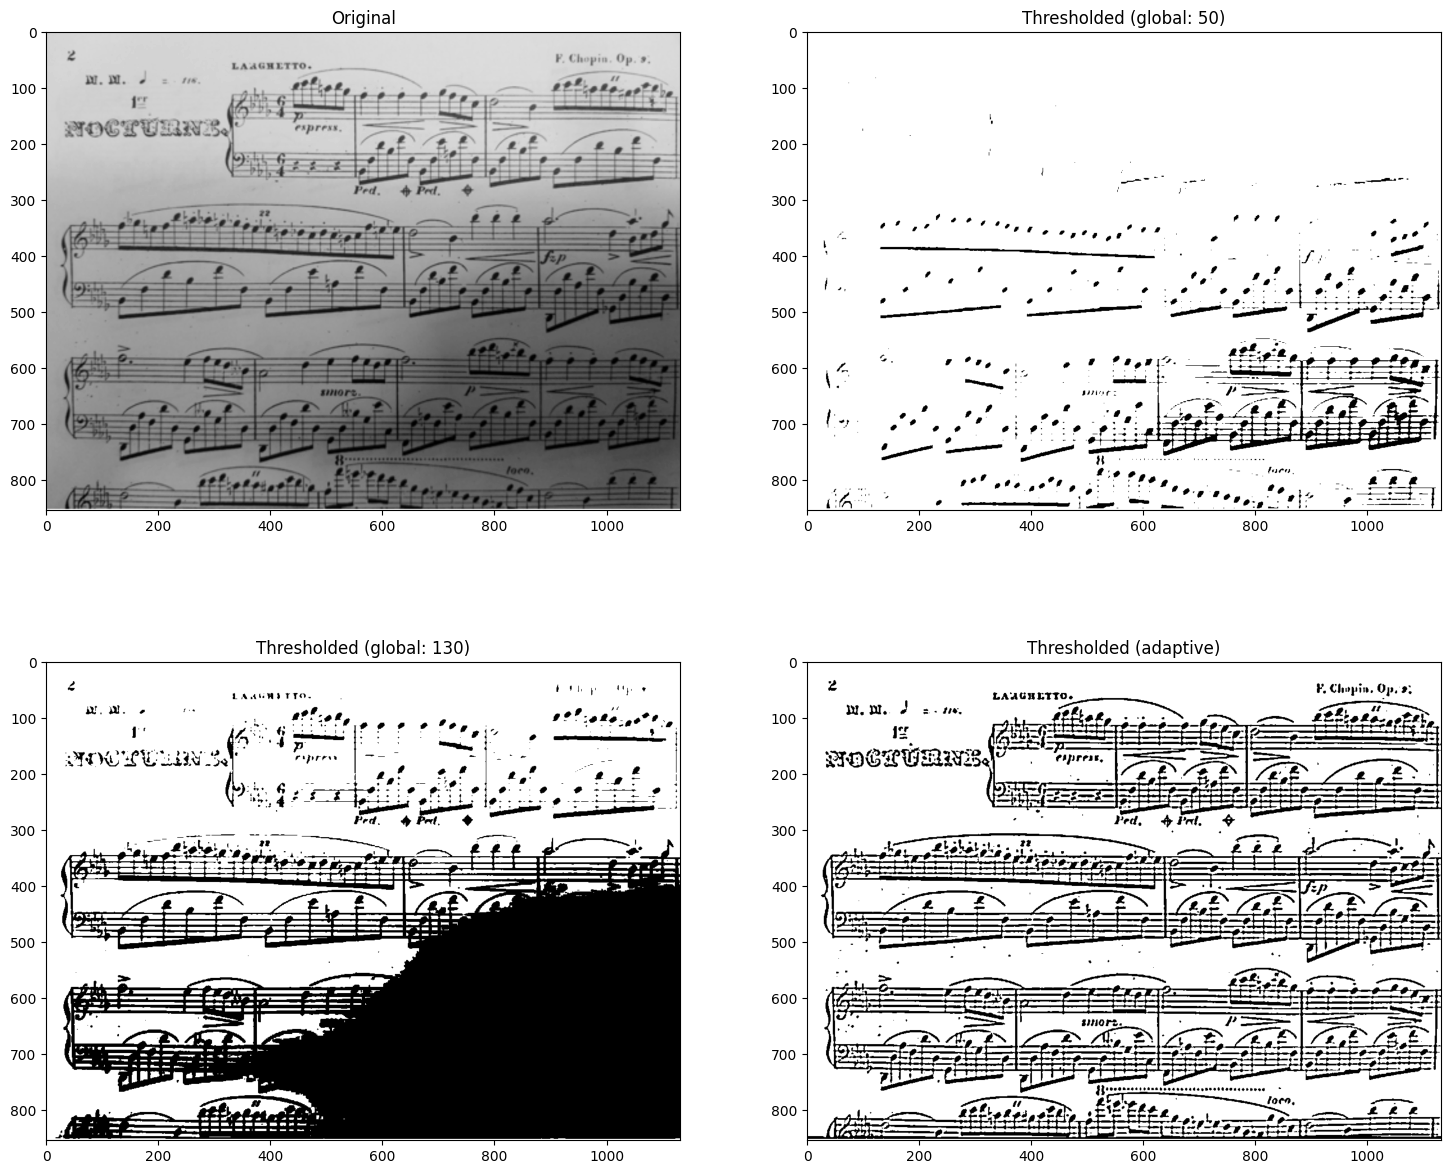

In [9]:
# Read the original image
img_read = cv2.imread("assets/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

## Bitwise Operations

(200, 499)


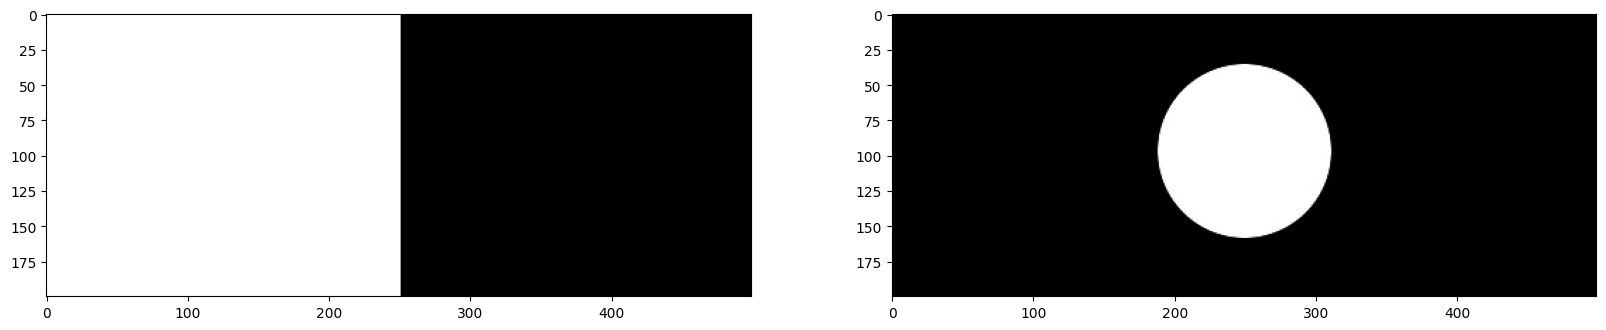

In [10]:
img_rec = cv2.imread("assets/rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("assets/circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

### <font color='green'>Bitwise AND Operator</font>

Syntax:
```
cv2.bitwise_and(src1, src2, mask)
```

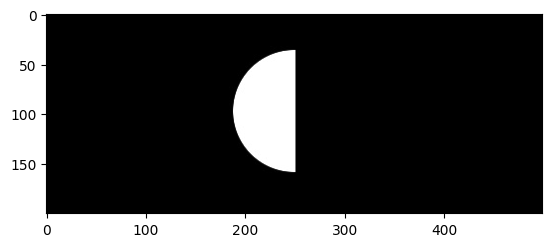

In [11]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### <font color='green'>Bitwise OR Operator</font>

Syntax:
```
cv2.bitwise_or(src1, src2, mask)
```

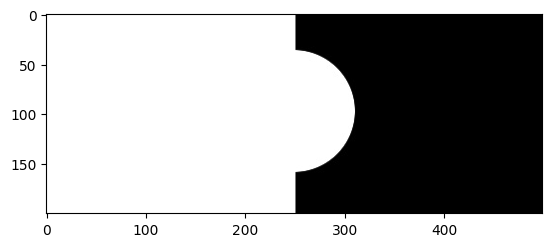

In [12]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### <font color='green'>Bitwise XOR Operator</font>

Syntax:
```
cv2.bitwise_xor(src1, src2, mask)
```

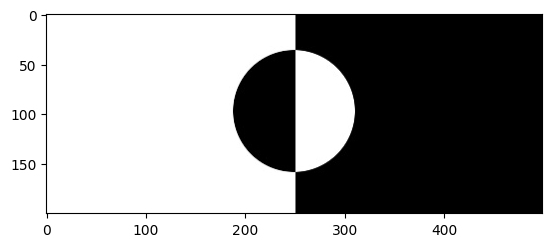

In [13]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

## Application: Logo Manipulation

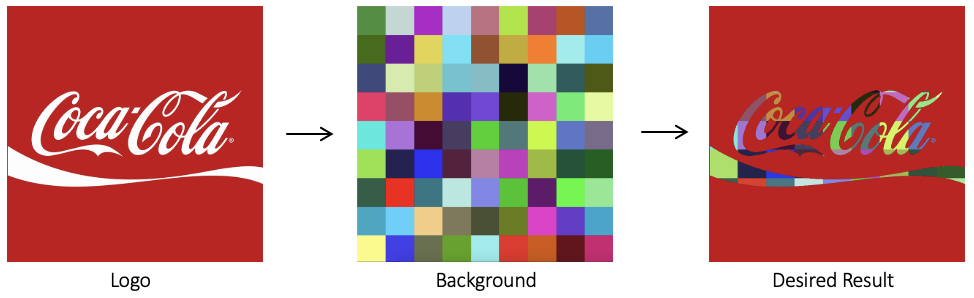

In [14]:
Image(filename='assets/Logo_Manipulation.png')

### <font color='green'>Read Foreground Image</font>

(700, 700, 3)


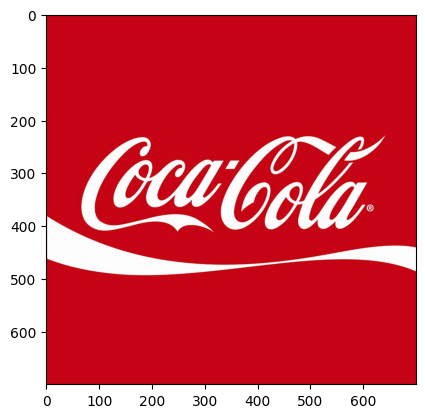

In [15]:
img_bgr = cv2.imread("assets/coca-cola-logo.png")
img_rgb = img_bgr[:, :, ::-1]
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_h = img_rgb.shape[0]
logo_w = img_rgb.shape[1]

### <font color='green'>Read Background Image</font>

(700, 700, 3)


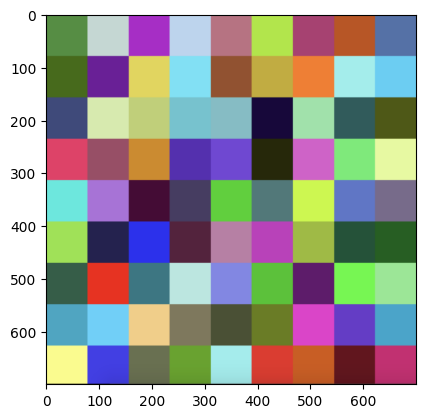

In [16]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("assets/checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Resize background image to same size as logo image
img_background_rgb = cv2.resize(img_background_rgb, (logo_w, logo_h), interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### <font color='green'>Create Mask for Original Image</font>

(700, 700)


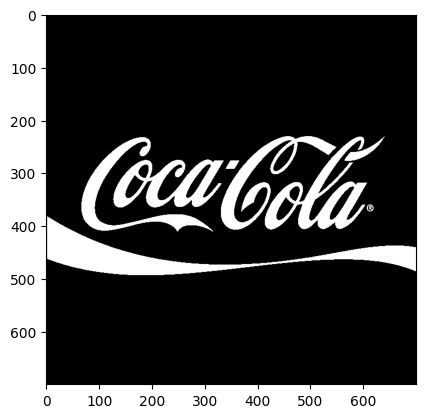

In [17]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to create a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap='gray')
print(img_mask.shape)

### <font color='green'>Invert the Mask</font>

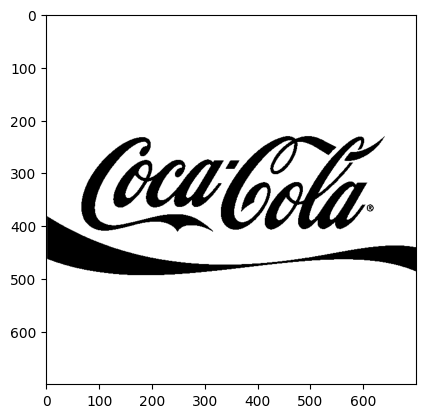

In [18]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap='gray')

### <font color='green'>Apply background on the Mask</font>

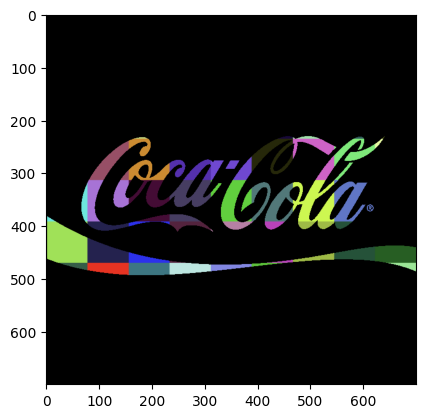

In [19]:
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### <font color='green'>Isolate foreground from the image</font>

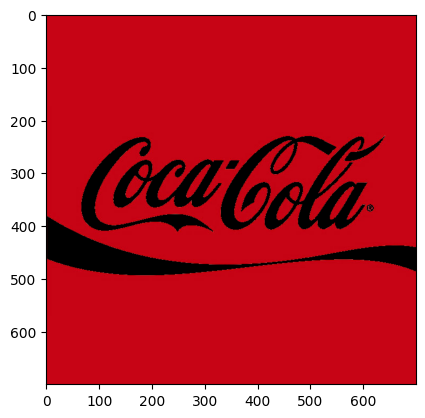

In [20]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### <font color='green'>Combine Foreground and Background</font>

True

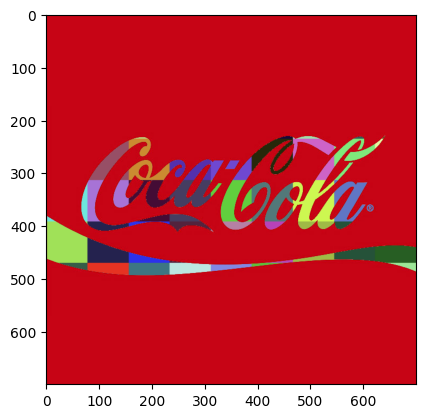

In [21]:
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("assets/logo_final.png", result[:, :, ::-1])